# Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Data

In [2]:
df=pd.read_csv('BreastCancerWisconsinDataSet.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.shape

(569, 32)

In [5]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [6]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

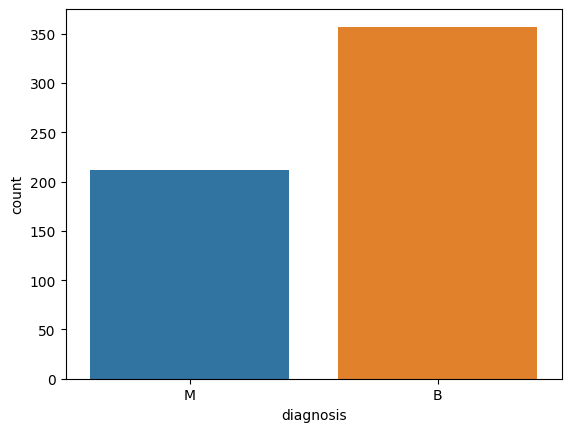

In [8]:
sns.countplot(df,x='diagnosis',hue='diagnosis')

 Breast Tumors is benign(B) (not cancer) or malignant (M)(cancer)

 # Create an XGBoost model

Now, you can prepare your data for model building. You will use the diagnosis column as your target variable so you must remove it from the set of predictors. You must also remove the id variable.

In [9]:
y=df['diagnosis']

In [10]:
df.drop('diagnosis',axis=1,inplace=True)

In [11]:
df.shape

(569, 31)

In [12]:
X=df.iloc[:,1:].values

In [13]:
len(X[0])


30

In [14]:
from sklearn.preprocessing import LabelEncoder

labelencoder_Y = LabelEncoder()
y = labelencoder_Y.fit_transform(y)

# Split the data set into:

Train data set

Test data set

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=143)

In [16]:
# List the number of records in each data set.
print("Number of training records: " + str(X_train.shape[0]))
print("Number of testing records : " + str(X_test.shape[0]))

Number of training records: 426
Number of testing records : 143


The data has been successfully split into two data sets:

The train data set, which is the largest group, will be used for training
The test data set will be used for model evaluation and is used to test the assumptions of the model

In [17]:
# Import the libraries you need to create the XGBoost model.
from xgboost.sklearn import XGBClassifier
import warnings

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [18]:
warnings.filterwarnings("ignore", message="`use_label_encoder` is deprecated in 1.7.0.")

# Create the XGB classifier, xgb_model.
xgb_model = XGBClassifier(use_label_encoder=False, n_jobs=1)

In [19]:
# List the default parameters.
print(xgb_model.get_xgb_params())

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'eval_metric': None, 'gamma': None, 'grow_policy': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'monotone_constraints': None, 'multi_strategy': None, 'n_jobs': 1, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [20]:
# Train and evaluate.
xgb_model.fit(X_train, y_train, eval_metric=['error'], eval_set=[((X_train, y_train)),(X_test, y_test)])

[0]	validation_0-error:0.04225	validation_1-error:0.04196
[1]	validation_0-error:0.01878	validation_1-error:0.03497
[2]	validation_0-error:0.01643	validation_1-error:0.04895
[3]	validation_0-error:0.00704	validation_1-error:0.04895
[4]	validation_0-error:0.00469	validation_1-error:0.04196
[5]	validation_0-error:0.00469	validation_1-error:0.04196
[6]	validation_0-error:0.00469	validation_1-error:0.04196
[7]	validation_0-error:0.00469	validation_1-error:0.04196
[8]	validation_0-error:0.00235	validation_1-error:0.04895
[9]	validation_0-error:0.00235	validation_1-error:0.03497
[10]	validation_0-error:0.00235	validation_1-error:0.03497
[11]	validation_0-error:0.00235	validation_1-error:0.03497
[12]	validation_0-error:0.00235	validation_1-error:0.03497
[13]	validation_0-error:0.00235	validation_1-error:0.03497
[14]	validation_0-error:0.00235	validation_1-error:0.03497


[15]	validation_0-error:0.00235	validation_1-error:0.04196
[16]	validation_0-error:0.00000	validation_1-error:0.03497
[17]	validation_0-error:0.00000	validation_1-error:0.03497
[18]	validation_0-error:0.00000	validation_1-error:0.04196
[19]	validation_0-error:0.00000	validation_1-error:0.04196
[20]	validation_0-error:0.00000	validation_1-error:0.04196
[21]	validation_0-error:0.00000	validation_1-error:0.04895
[22]	validation_0-error:0.00000	validation_1-error:0.04196
[23]	validation_0-error:0.00000	validation_1-error:0.04895
[24]	validation_0-error:0.00000	validation_1-error:0.04895
[25]	validation_0-error:0.00000	validation_1-error:0.04196
[26]	validation_0-error:0.00000	validation_1-error:0.03497
[27]	validation_0-error:0.00000	validation_1-error:0.04895
[28]	validation_0-error:0.00000	validation_1-error:0.04895
[29]	validation_0-error:0.00000	validation_1-error:0.04895
[30]	validation_0-error:0.00000	validation_1-error:0.05594
[31]	validation_0-error:0.00000	validation_1-error:0.048

c:\Python312\Lib\site-packages\xgboost\sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[36]	validation_0-error:0.00000	validation_1-error:0.05594
[37]	validation_0-error:0.00000	validation_1-error:0.04895
[38]	validation_0-error:0.00000	validation_1-error:0.04895
[39]	validation_0-error:0.00000	validation_1-error:0.04895
[40]	validation_0-error:0.00000	validation_1-error:0.04895
[41]	validation_0-error:0.00000	validation_1-error:0.04895
[42]	validation_0-error:0.00000	validation_1-error:0.04895
[43]	validation_0-error:0.00000	validation_1-error:0.04895
[44]	validation_0-error:0.00000	validation_1-error:0.04895
[45]	validation_0-error:0.00000	validation_1-error:0.05594
[46]	validation_0-error:0.00000	validation_1-error:0.04895
[47]	validation_0-error:0.00000	validation_1-error:0.04895
[48]	validation_0-error:0.00000	validation_1-error:0.04895
[49]	validation_0-error:0.00000	validation_1-error:0.04895
[50]	validation_0-error:0.00000	validation_1-error:0.04895
[51]	validation_0-error:0.00000	validation_1-error:0.04895
[52]	validation_0-error:0.00000	validation_1-error:0.048

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=1,
              num_parallel_tree=None, random_state=None, ...)

In [21]:
from matplotlib import pyplot

%matplotlib inline

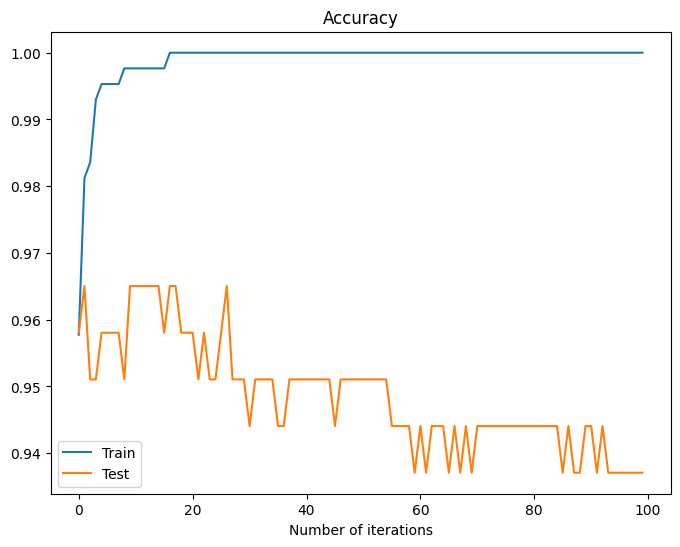

In [22]:
# Plot and display the performance evaluation
xgb_eval = xgb_model.evals_result()
eval_steps = range(len(xgb_eval['validation_0']['error']))

fig, ax = pyplot.subplots(1, 1, sharex=True, figsize=(8, 6))

ax.plot(eval_steps, [1-x for x in xgb_eval['validation_0']['error']], label='Train')
ax.plot(eval_steps, [1-x for x in xgb_eval['validation_1']['error']], label='Test')
ax.legend()
ax.set_title('Accuracy')
ax.set_xlabel('Number of iterations');

You can see that there is model overfitting, and there is a decrease in model accuracy after about 15 iterations

Select the trained model obtained after 15 iterations

In [23]:
# Select trained model.
n_trees = 15
y_pred = xgb_model.predict(X_test, iteration_range=(0, n_trees))

In [24]:
# Check the accuracy of the trained model.
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: %.1f%%" % (accuracy * 100.0))

Accuracy: 96.5%


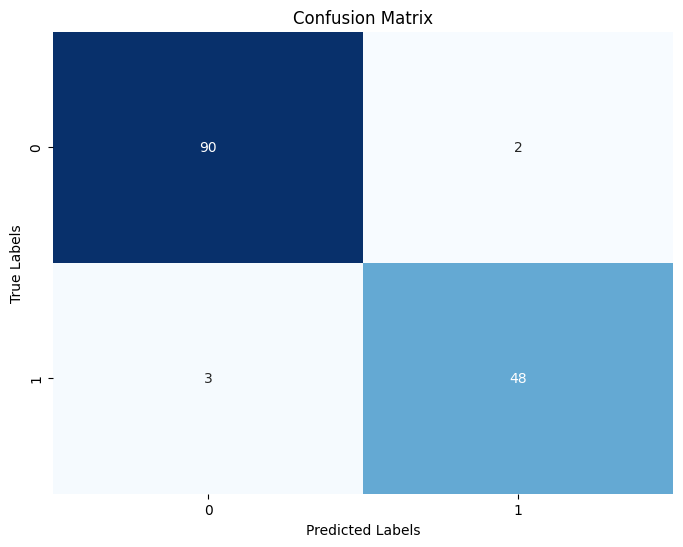

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()